In [1]:
!pip install pomegranate==0.13.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pomegranate: filename=pomegranate-0.13.3-cp311-cp311-linux_x86_64.whl size=16384567 sha256=674b8d8e43086ae8ed0d6d9d80305e62a8aa33bd38d26b508897798a8da02a83
  Stored in directory: /root/.cache/pip/wheels/06/fa/39/6fbce87fef520a103c73cb592f53c4a6ef809649522c8ceccd
Successfully built pomegranate


## Initial Model

In [ ]:
from pomegranate import Node, DiscreteDistribution, ConditionalProbabilityTable, BayesianNetwork

# Weather node has no parents
Weather = Node(DiscreteDistribution({
    "Sunny": 0.45,
    "Rainy": 0.55
}), name="weather")

# Time of Day node has no parents
Time_of_day = Node(DiscreteDistribution({
    "Morning": 0.5,
    "Afternoon": 0.3,
    "Evening": 0.2
}), name="time_of_day")

# Historical Congestion Level node depends on Weather and Time of Day
Historical_congestion_level = Node(ConditionalProbabilityTable([
    ["Sunny", "Morning", "Low", 0.2],
    ["Sunny", "Morning", "Medium", 0.3],
    ["Sunny", "Morning", "High", 0.5],
    ["Sunny", "Afternoon", "Low", 0.4],
    ["Sunny", "Afternoon", "Medium", 0.4],
    ["Sunny", "Afternoon", "High", 0.2],
    ["Sunny", "Evening", "Low", 0.2],
    ["Sunny", "Evening", "Medium", 0.3],
    ["Sunny", "Evening", "High", 0.5],
    ["Rainy", "Morning", "Low", 0.1],
    ["Rainy", "Morning", "Medium", 0.3],
    ["Rainy", "Morning", "High", 0.6],
    ["Rainy", "Afternoon", "Low", 0.3],
    ["Rainy", "Afternoon", "Medium", 0.4],
    ["Rainy", "Afternoon", "High", 0.3],
    ["Rainy", "Evening", "Low", 0.1],
    ["Rainy", "Evening", "Medium", 0.3],
    ["Rainy", "Evening", "High", 0.6],
], [Weather.distribution, Time_of_day.distribution]), name="historical_congestion_level")

# Current Congestion Level node depends on Historical Congestion Level
Current_congestion_level = Node(ConditionalProbabilityTable([
    ["Low", "Low", 0.6],
    ["Low", "Medium", 0.3],
    ["Low", "High", 0.1],
    ["Medium", "Low", 0.3],
    ["Medium", "Medium", 0.4],
    ["Medium", "High", 0.3],
    ["High", "Low", 0.1],
    ["High", "Medium", 0.3],
    ["High", "High", 0.6],
], [Historical_congestion_level.distribution]), name="current_congestion_level")

# Create a Bayesian Network and add states
model = BayesianNetwork("Traffic Congestion Prediction")
model.add_states(Weather, Time_of_day, Historical_congestion_level, Current_congestion_level)

# Add edges connecting nodes
model.add_edge(Weather, Historical_congestion_level)
model.add_edge(Time_of_day, Historical_congestion_level)
model.add_edge(Historical_congestion_level, Current_congestion_level)

# Finalize model
model.bake()



Enter the weather (Sunny, Rainy): Sunny
Enter the time of day (Morning, Afternoon, Evening): Morning

Predicted probabilities for Current Congestion Level:
  Low: 0.2600
  Medium: 0.3300
  High: 0.4100


In [ ]:
# User input
weather_input = input("Enter the weather (Sunny, Rainy): ").strip().capitalize()
time_of_day_input = input("Enter the time of day (Morning, Afternoon, Evening): ").strip().capitalize()

# Validate input
if weather_input not in ["Sunny", "Rainy"] or time_of_day_input not in ["Morning", "Afternoon", "Evening"]:
    print("Invalid input. Please enter valid weather and time of day.")
else:
    # Predict probabilities
    predictions = model.predict_proba({
        "weather": weather_input,
        "time_of_day": time_of_day_input
    })

    # Print results
    print("\nPredicted probabilities for Current Congestion Level:")
    for value, probability in predictions[-1].parameters[0].items():
        print(f"  {value}: {probability:.4f}")


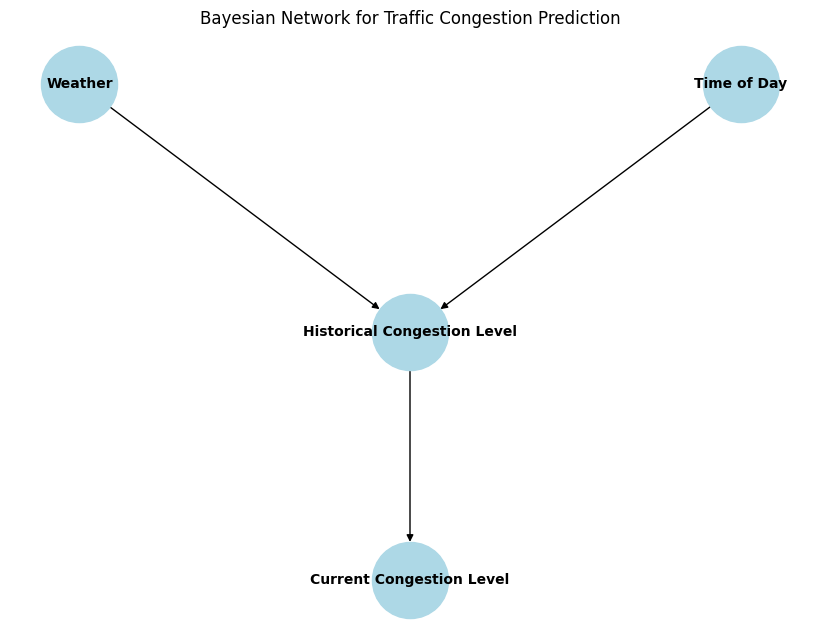

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ["Weather", "Time of Day", "Historical Congestion Level", "Current Congestion Level"]
G.add_nodes_from(nodes)

# Add edges based on the Bayesian network structure
edges = [
    ("Weather", "Historical Congestion Level"),
    ("Time of Day", "Historical Congestion Level"),
    ("Historical Congestion Level", "Current Congestion Level")
]
G.add_edges_from(edges)

# Set positions for nodes
pos = {
    "Weather": (0, 2),
    "Time of Day": (2, 2),
    "Historical Congestion Level": (1, 1),
    "Current Congestion Level": (1, 0)
}

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black",
        node_size=3000, font_size=10, font_weight="bold", arrows=True)

# Add title
plt.title("Bayesian Network for Traffic Congestion Prediction")
plt.show()


##2nd Model (Introduce Day_of_week)

In [22]:
from pomegranate import Node, DiscreteDistribution, ConditionalProbabilityTable, BayesianNetwork

# Weather node has no parents
Weather = Node(DiscreteDistribution({
    "Sunny": 0.45,
    "Rainy": 0.55
}), name="weather")

# Time of Day node has no parents
Time_of_day = Node(DiscreteDistribution({
    "Morning": 0.5,
    "Afternoon": 0.3,
    "Evening": 0.2
}), name="time_of_day")

# Day of the Week node has no parents
Day_of_week = Node(DiscreteDistribution({
    "Weekday": 0.7,
    "Weekend": 0.3
}), name="day_of_week")

# Historical Congestion Level node depends on Weather, Time of Day, and Day of the Week
Historical_congestion_level = Node(ConditionalProbabilityTable([
    ["Sunny", "Morning", "Weekday", "Low", 0.2],
    ["Sunny", "Morning", "Weekday", "Medium", 0.3],
    ["Sunny", "Morning", "Weekday", "High", 0.5],
    ["Sunny", "Morning", "Weekend", "Low", 0.3],
    ["Sunny", "Morning", "Weekend", "Medium", 0.4],
    ["Sunny", "Morning", "Weekend", "High", 0.3],
    ["Rainy", "Morning", "Weekday", "Low", 0.1],
    ["Rainy", "Morning", "Weekday", "Medium", 0.3],
    ["Rainy", "Morning", "Weekday", "High", 0.6],
    ["Rainy", "Morning", "Weekend", "Low", 0.2],
    ["Rainy", "Morning", "Weekend", "Medium", 0.4],
    ["Rainy", "Morning", "Weekend", "High", 0.4],
    ["Sunny", "Afternoon", "Weekday", "Low", 0.4],
    ["Sunny", "Afternoon", "Weekday", "Medium", 0.4],
    ["Sunny", "Afternoon", "Weekday", "High", 0.2],
    ["Sunny", "Afternoon", "Weekend", "Low", 0.5],
    ["Sunny", "Afternoon", "Weekend", "Medium", 0.3],
    ["Sunny", "Afternoon", "Weekend", "High", 0.2],
    ["Sunny", "Evening", "Weekday", "Low", 0.2],
    ["Sunny", "Evening", "Weekday", "Medium", 0.3],
    ["Sunny", "Evening", "Weekday", "High", 0.5],
    ["Sunny", "Evening", "Weekend", "Low", 0.3],
    ["Sunny", "Evening", "Weekend", "Medium", 0.4],
    ["Sunny", "Evening", "Weekend", "High", 0.3],
    ["Rainy", "Afternoon", "Weekday", "Low", 0.3],
    ["Rainy", "Afternoon", "Weekday", "Medium", 0.4],
    ["Rainy", "Afternoon", "Weekday", "High", 0.3],
    ["Rainy", "Afternoon", "Weekend", "Low", 0.4],
    ["Rainy", "Afternoon", "Weekend", "Medium", 0.4],
    ["Rainy", "Afternoon", "Weekend", "High", 0.2],
    ["Rainy", "Evening", "Weekday", "Low", 0.1],
    ["Rainy", "Evening", "Weekday", "Medium", 0.3],
    ["Rainy", "Evening", "Weekday", "High", 0.6],
    ["Rainy", "Evening", "Weekend", "Low", 0.2],
    ["Rainy", "Evening", "Weekend", "Medium", 0.4],
    ["Rainy", "Evening", "Weekend", "High", 0.4],
], [Weather.distribution, Time_of_day.distribution, Day_of_week.distribution]), name="historical_congestion_level")

# Current Congestion Level node depends on Historical Congestion Level
Current_congestion_level = Node(ConditionalProbabilityTable([
    ["Low", "Low", 0.6],
    ["Low", "Medium", 0.3],
    ["Low", "High", 0.1],
    ["Medium", "Low", 0.3],
    ["Medium", "Medium", 0.4],
    ["Medium", "High", 0.3],
    ["High", "Low", 0.1],
    ["High", "Medium", 0.3],
    ["High", "High", 0.6],
], [Historical_congestion_level.distribution]), name="current_congestion_level")

# Create a Bayesian Network and add states
model = BayesianNetwork("Traffic Congestion Prediction")
model.add_states(Weather, Time_of_day, Day_of_week, Historical_congestion_level, Current_congestion_level)

# Add edges connecting nodes
model.add_edge(Weather, Historical_congestion_level)
model.add_edge(Time_of_day, Historical_congestion_level)
model.add_edge(Day_of_week, Historical_congestion_level)
model.add_edge(Historical_congestion_level, Current_congestion_level)

# Finalize model
model.bake()


In [23]:
# User input
weather_input = input("Enter the weather (Sunny, Rainy): ").strip().capitalize()
time_of_day_input = input("Enter the time of day (Morning, Afternoon, Evening): ").strip().capitalize()
day_of_week_input = input("Enter the day of the week (Weekday, Weekend): ").strip().capitalize()

# Validate input
if weather_input not in ["Sunny", "Rainy"] or time_of_day_input not in ["Morning", "Afternoon", "Evening"] or day_of_week_input not in ["Weekday", "Weekend"]:
    print("Invalid input. Please enter valid weather, time of day, and day of the week.")
else:
    # Predict probabilities
    predictions = model.predict_proba({
        "weather": weather_input,
        "time_of_day": time_of_day_input,
        "day_of_week": day_of_week_input
    })

    # Print results
    print("\nPredicted probabilities for Current Congestion Level:")
    for value, probability in predictions[-1].parameters[0].items():
        print(f"  {value}: {probability:.4f}")


Enter the weather (Sunny, Rainy): sunny
Enter the time of day (Morning, Afternoon, Evening): afternoon
Enter the day of the week (Weekday, Weekend): weekday

Predicted probabilities for Current Congestion Level:
  Medium: 0.3400
  Low: 0.3800
  High: 0.2800


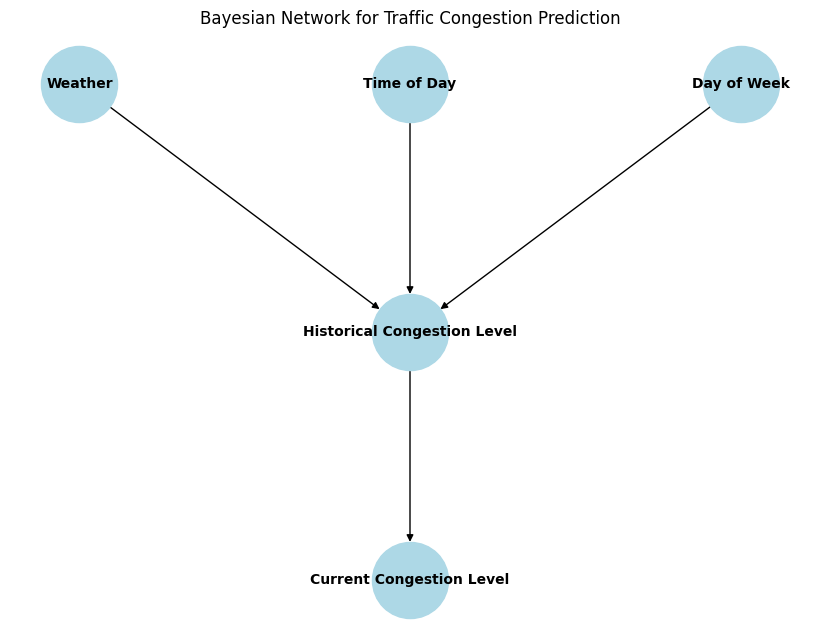

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for the Bayesian Network
G = nx.DiGraph()

# Add nodes
nodes = ["Weather", "Time of Day", "Day of Week", "Historical Congestion Level", "Current Congestion Level"]
G.add_nodes_from(nodes)

# Add edges based on the Bayesian network structure
edges = [
    ("Weather", "Historical Congestion Level"),
    ("Time of Day", "Historical Congestion Level"),
    ("Day of Week", "Historical Congestion Level"),
    ("Historical Congestion Level", "Current Congestion Level")
]
G.add_edges_from(edges)

# Set positions for nodes
pos = {
    "Weather": (0, 2),
    "Time of Day": (2, 2),
    "Day of Week": (4, 2),
    "Historical Congestion Level": (2, 1),
    "Current Congestion Level": (2, 0)
}

# Draw the Bayesian network graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black",
        node_size=3000, font_size=10, font_weight="bold", arrows=True)

# Add title
plt.title("Bayesian Network for Traffic Congestion Prediction")
plt.show()


## 3rd Model (Introduce Roadwork/Accident)

In [26]:
from pomegranate import Node, DiscreteDistribution, ConditionalProbabilityTable, BayesianNetwork

# Weather node has no parents
Weather = Node(DiscreteDistribution({
    "Sunny": 0.45,
    "Rainy": 0.55
}), name="weather")

# Time of Day node has no parents
Time_of_day = Node(DiscreteDistribution({
    "Morning": 0.5,
    "Afternoon": 0.3,
    "Evening": 0.2
}), name="time_of_day")

# Day of the Week node has no parents
Day_of_week = Node(DiscreteDistribution({
    "Weekday": 0.7,
    "Weekend": 0.3
}), name="day_of_week")

# Roadwork/Accident node has no parents
Roadwork_accident = Node(DiscreteDistribution({
    "Yes": 0.2,
    "No": 0.8
}), name="roadwork_accident")

# Historical Congestion Level node depends on Weather, Time of Day, and Day of the Week
Historical_congestion_level = Node(ConditionalProbabilityTable([
    ["Sunny", "Morning", "Weekday", "Low", 0.2],
    ["Sunny", "Morning", "Weekday", "Medium", 0.3],
    ["Sunny", "Morning", "Weekday", "High", 0.5],
    ["Sunny", "Morning", "Weekend", "Low", 0.3],
    ["Sunny", "Morning", "Weekend", "Medium", 0.4],
    ["Sunny", "Morning", "Weekend", "High", 0.3],
    ["Rainy", "Morning", "Weekday", "Low", 0.1],
    ["Rainy", "Morning", "Weekday", "Medium", 0.3],
    ["Rainy", "Morning", "Weekday", "High", 0.6],
    ["Rainy", "Morning", "Weekend", "Low", 0.2],
    ["Rainy", "Morning", "Weekend", "Medium", 0.4],
    ["Rainy", "Morning", "Weekend", "High", 0.4],
    ["Sunny", "Afternoon", "Weekday", "Low", 0.4],
    ["Sunny", "Afternoon", "Weekday", "Medium", 0.4],
    ["Sunny", "Afternoon", "Weekday", "High", 0.2],
    ["Sunny", "Afternoon", "Weekend", "Low", 0.5],
    ["Sunny", "Afternoon", "Weekend", "Medium", 0.3],
    ["Sunny", "Afternoon", "Weekend", "High", 0.2],
    ["Sunny", "Evening", "Weekday", "Low", 0.2],
    ["Sunny", "Evening", "Weekday", "Medium", 0.3],
    ["Sunny", "Evening", "Weekday", "High", 0.5],
    ["Sunny", "Evening", "Weekend", "Low", 0.3],
    ["Sunny", "Evening", "Weekend", "Medium", 0.4],
    ["Sunny", "Evening", "Weekend", "High", 0.3],
    ["Rainy", "Afternoon", "Weekday", "Low", 0.3],
    ["Rainy", "Afternoon", "Weekday", "Medium", 0.4],
    ["Rainy", "Afternoon", "Weekday", "High", 0.3],
    ["Rainy", "Afternoon", "Weekend", "Low", 0.4],
    ["Rainy", "Afternoon", "Weekend", "Medium", 0.4],
    ["Rainy", "Afternoon", "Weekend", "High", 0.2],
    ["Rainy", "Evening", "Weekday", "Low", 0.1],
    ["Rainy", "Evening", "Weekday", "Medium", 0.3],
    ["Rainy", "Evening", "Weekday", "High", 0.6],
    ["Rainy", "Evening", "Weekend", "Low", 0.2],
    ["Rainy", "Evening", "Weekend", "Medium", 0.4],
    ["Rainy", "Evening", "Weekend", "High", 0.4],
], [Weather.distribution, Time_of_day.distribution, Day_of_week.distribution]), name="historical_congestion_level")

# Current Congestion Level node depends on Historical Congestion Level and Roadwork/Accident
Current_congestion_level = Node(ConditionalProbabilityTable([
    ["Low", "No", "Low", 0.7],
    ["Low", "No", "Medium", 0.2],
    ["Low", "No", "High", 0.1],
    ["Low", "Yes", "Low", 0.5],
    ["Low", "Yes", "Medium", 0.3],
    ["Low", "Yes", "High", 0.2],
    ["Medium", "No", "Low", 0.3],
    ["Medium", "No", "Medium", 0.4],
    ["Medium", "No", "High", 0.3],
    ["Medium", "Yes", "Low", 0.2],
    ["Medium", "Yes", "Medium", 0.4],
    ["Medium", "Yes", "High", 0.4],
    ["High", "No", "Low", 0.1],
    ["High", "No", "Medium", 0.3],
    ["High", "No", "High", 0.6],
    ["High", "Yes", "Low", 0.05],
    ["High", "Yes", "Medium", 0.25],
    ["High", "Yes", "High", 0.7],
], [Historical_congestion_level.distribution, Roadwork_accident.distribution]), name="current_congestion_level")

# Create a Bayesian Network and add states
model = BayesianNetwork("Traffic Congestion Prediction")
model.add_states(Weather, Time_of_day, Day_of_week, Roadwork_accident, Historical_congestion_level, Current_congestion_level)

# Add edges connecting nodes
model.add_edge(Weather, Historical_congestion_level)
model.add_edge(Time_of_day, Historical_congestion_level)
model.add_edge(Day_of_week, Historical_congestion_level)
model.add_edge(Historical_congestion_level, Current_congestion_level)
model.add_edge(Roadwork_accident, Current_congestion_level)

# Finalize model
model.bake()

In [28]:
# User input
weather_input = input("Enter the weather (Sunny, Rainy): ").strip().capitalize()
time_of_day_input = input("Enter the time of day (Morning, Afternoon, Evening): ").strip().capitalize()
day_of_week_input = input("Enter the day of the week (Weekday, Weekend): ").strip().capitalize()
roadwork_accident_input = input("Is there roadwork or an accident? (Yes, No): ").strip().capitalize()

# Validate input
if weather_input not in ["Sunny", "Rainy"] or time_of_day_input not in ["Morning", "Afternoon", "Evening"] or day_of_week_input not in ["Weekday", "Weekend"] or roadwork_accident_input not in ["Yes", "No"]:
    print("Invalid input. Please enter valid weather, time of day, day of the week, and roadwork/accident status.")
else:
    # Predict probabilities
    predictions = model.predict_proba({
        "weather": weather_input,
        "time_of_day": time_of_day_input,
        "day_of_week": day_of_week_input,
        "roadwork_accident": roadwork_accident_input
    })

    # Print results
    print("\nPredicted probabilities for Current Congestion Level:")
    for value, probability in predictions[-1].parameters[0].items():
        print(f"  {value}: {probability:.4f}")


Enter the weather (Sunny, Rainy): Sunny
Enter the time of day (Morning, Afternoon, Evening): Morning
Enter the day of the week (Weekday, Weekend): Weekday
Is there roadwork or an accident? (Yes, No): No

Predicted probabilities for Current Congestion Level:
  Medium: 0.3100
  Low: 0.2800
  High: 0.4100


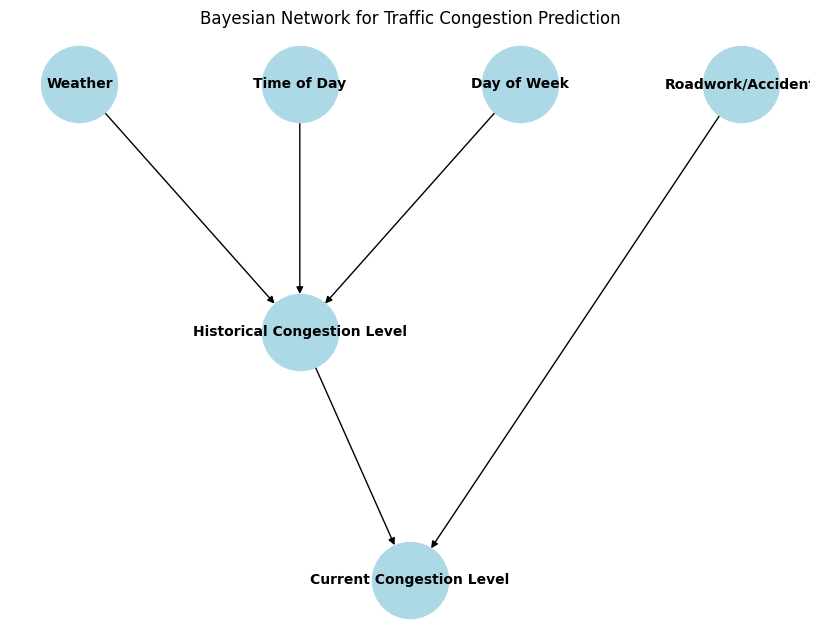

In [14]:
# Create a directed graph for the Bayesian Network
G = nx.DiGraph()

# Add nodes
nodes = ["Weather", "Time of Day", "Day of Week", "Roadwork/Accident", "Historical Congestion Level", "Current Congestion Level"]
G.add_nodes_from(nodes)

# Add edges based on the Bayesian network structure
edges = [
    ("Weather", "Historical Congestion Level"),
    ("Time of Day", "Historical Congestion Level"),
    ("Day of Week", "Historical Congestion Level"),
    ("Historical Congestion Level", "Current Congestion Level"),
    ("Roadwork/Accident", "Current Congestion Level")
]
G.add_edges_from(edges)

# Set positions for nodes
pos = {
    "Weather": (0, 2),
    "Time of Day": (2, 2),
    "Day of Week": (4, 2),
    "Roadwork/Accident": (6, 2),
    "Historical Congestion Level": (2, 1),
    "Current Congestion Level": (3, 0)
}

# Draw the Bayesian network graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black",
        node_size=3000, font_size=10, font_weight="bold", arrows=True)

# Add title
plt.title("Bayesian Network for Traffic Congestion Prediction")
plt.show()


## 4th Model (Introduce Vehicle Count)

In [30]:
from pomegranate import Node, DiscreteDistribution, ConditionalProbabilityTable, BayesianNetwork

# Weather node has no parents
Weather = Node(DiscreteDistribution({
    "Sunny": 0.45,
    "Rainy": 0.55
}), name="weather")

# Time of Day node has no parents
Time_of_day = Node(DiscreteDistribution({
    "Morning": 0.5,
    "Afternoon": 0.3,
    "Evening": 0.2
}), name="time_of_day")

# Day of the Week node has no parents
Day_of_week = Node(DiscreteDistribution({
    "Weekday": 0.7,
    "Weekend": 0.3
}), name="day_of_week")

# Roadwork/Accident node has no parents
Roadwork_accident = Node(DiscreteDistribution({
    "Yes": 0.2,
    "No": 0.8
}), name="roadwork_accident")

# Vehicle Count depends on Time of Day and Day of the Week
Vehicle_count = Node(ConditionalProbabilityTable([
    # Weekday
    ["Morning", "Weekday", "Low", 0.2],
    ["Morning", "Weekday", "Medium", 0.3],
    ["Morning", "Weekday", "High", 0.5],

    ["Afternoon", "Weekday", "Low", 0.2],
    ["Afternoon", "Weekday", "Medium", 0.5],
    ["Afternoon", "Weekday", "High", 0.3],

    ["Evening", "Weekday", "Low", 0.4],
    ["Evening", "Weekday", "Medium", 0.4],
    ["Evening", "Weekday", "High", 0.2],
    # Weekend
    ["Morning", "Weekend", "Low", 0.3],
    ["Morning", "Weekend", "Medium", 0.5],
    ["Morning", "Weekend", "High", 0.2],

    ["Afternoon", "Weekend", "Low", 0.4],
    ["Afternoon", "Weekend", "Medium", 0.4],
    ["Afternoon", "Weekend", "High", 0.2],

    ["Evening", "Weekend", "Low", 0.5],
    ["Evening", "Weekend", "Medium", 0.3],
    ["Evening", "Weekend", "High", 0.2],
], [Time_of_day.distribution, Day_of_week.distribution]), name="vehicle_count")

# Historical Congestion Level depends on Weather, Time of Day, and Day of the Week
Historical_congestion_level = Node(ConditionalProbabilityTable([
    ["Sunny", "Morning", "Weekday", "Low", 0.2],
    ["Sunny", "Morning", "Weekday", "Medium", 0.3],
    ["Sunny", "Morning", "Weekday", "High", 0.5],

    ["Sunny", "Morning", "Weekend", "Low", 0.3],
    ["Sunny", "Morning", "Weekend", "Medium", 0.4],
    ["Sunny", "Morning", "Weekend", "High", 0.3],

    ["Sunny", "Afternoon", "Weekday", "Low", 0.3],
    ["Sunny", "Afternoon", "Weekday", "Medium", 0.4],
    ["Sunny", "Afternoon", "Weekday", "High", 0.3],

    ["Sunny", "Afternoon", "Weekend", "Low", 0.25],
    ["Sunny", "Afternoon", "Weekend", "Medium", 0.45],
    ["Sunny", "Afternoon", "Weekend", "High", 0.3],

    ["Sunny", "Evening", "Weekday", "Low", 0.2],
    ["Sunny", "Evening", "Weekday", "Medium", 0.3],
    ["Sunny", "Evening", "Weekday", "High", 0.5],

    ["Sunny", "Evening", "Weekend", "Low", 0.2],
    ["Sunny", "Evening", "Weekend", "Medium", 0.35],
    ["Sunny", "Evening", "Weekend", "High", 0.45],
    # Rain
    ["Rainy", "Morning", "Weekday", "Low", 0.1],
    ["Rainy", "Morning", "Weekday", "Medium", 0.3],
    ["Rainy", "Morning", "Weekday", "High", 0.6],

    ["Rainy", "Morning", "Weekend", "Low", 0.15],
    ["Rainy", "Morning", "Weekend", "Medium", 0.35],
    ["Rainy", "Morning", "Weekend", "High", 0.5],

    ["Rainy", "Afternoon", "Weekday", "Low", 0.15],
    ["Rainy", "Afternoon", "Weekday", "Medium", 0.4],
    ["Rainy", "Afternoon", "Weekday", "High", 0.45],

    ["Rainy", "Afternoon", "Weekend", "Low", 0.1],
    ["Rainy", "Afternoon", "Weekend", "Medium", 0.35],
    ["Rainy", "Afternoon", "Weekend", "High", 0.55],

    ["Rainy", "Evening", "Weekday", "Low", 0.1],
    ["Rainy", "Evening", "Weekday", "Medium", 0.4],
    ["Rainy", "Evening", "Weekday", "High", 0.5],

    ["Rainy", "Evening", "Weekend", "Low", 0.1],
    ["Rainy", "Evening", "Weekend", "Medium", 0.35],
    ["Rainy", "Evening", "Weekend", "High", 0.55],
], [Weather.distribution, Time_of_day.distribution, Day_of_week.distribution]), name="historical_congestion_level")

# Current Congestion Level now depends on Historical Congestion Level, Roadwork/Accident, and Vehicle Count
Current_congestion_level = Node(ConditionalProbabilityTable([

    # No Accidents
    ["Low", "No", "Low", "Low", 0.8],
    ["Low", "No", "Low", "Medium", 0.15],
    ["Low", "No", "Low", "High", 0.05],
    ["Low", "No", "Medium", "Low", 0.6],
    ["Low", "No", "Medium", "Medium", 0.3],
    ["Low", "No", "Medium", "High", 0.1],
    ["Low", "No", "High", "Low", 0.4],
    ["Low", "No", "High", "Medium", 0.4],
    ["Low", "No", "High", "High", 0.2],

    ["Medium", "No", "Low", "Low", 0.3],
    ["Medium", "No", "Low", "Medium", 0.4],
    ["Medium", "No", "Low", "High", 0.3],
    ["Medium", "No", "Medium", "Low", 0.3],
    ["Medium", "No", "Medium", "Medium", 0.4],
    ["Medium", "No", "Medium", "High", 0.3],
    ["Medium", "No", "High", "Low", 0.2],
    ["Medium", "No", "High", "Medium", 0.4],
    ["Medium", "No", "High", "High", 0.4],

    ["High", "No", "Low", "Low", 0.1],
    ["High", "No", "Low", "Medium", 0.3],
    ["High", "No", "Low", "High", 0.6],
    ["High", "No", "Medium", "Low", 0.1],
    ["High", "No", "Medium", "Medium", 0.3],
    ["High", "No", "Medium", "High", 0.6],
    ["High", "No", "High", "Low", 0.05],
    ["High", "No", "High", "Medium", 0.25],
    ["High", "No", "High", "High", 0.7],
    # Yes Accidents
    ["Low", "Yes", "Low", "Low", 0.6],
    ["Low", "Yes", "Low", "Medium", 0.3],
    ["Low", "Yes", "Low", "High", 0.1],
    ["Low", "Yes", "Medium", "Low", 0.5],
    ["Low", "Yes", "Medium", "Medium", 0.35],
    ["Low", "Yes", "Medium", "High", 0.15],
    ["Low", "Yes", "High", "Low", 0.4],
    ["Low", "Yes", "High", "Medium", 0.4],
    ["Low", "Yes", "High", "High", 0.2],

    ["Medium", "Yes", "Low", "Low", 0.2],
    ["Medium", "Yes", "Low", "Medium", 0.4],
    ["Medium", "Yes", "Low", "High", 0.4],
    ["Medium", "Yes", "Medium", "Low", 0.2],
    ["Medium", "Yes", "Medium", "Medium", 0.4],
    ["Medium", "Yes", "Medium", "High", 0.4],
    ["Medium", "Yes", "High", "Low", 0.1],
    ["Medium", "Yes", "High", "Medium", 0.35],
    ["Medium", "Yes", "High", "High", 0.55],

    ["High", "Yes", "Low", "Low", 0.05],
    ["High", "Yes", "Low", "Medium", 0.25],
    ["High", "Yes", "Low", "High", 0.7],
    ["High", "Yes", "Medium", "Low", 0.05],
    ["High", "Yes", "Medium", "Medium", 0.2],
    ["High", "Yes", "Medium", "High", 0.75],
    ["High", "Yes", "High", "Low", 0.02],
    ["High", "Yes", "High", "Medium", 0.15],
    ["High", "Yes", "High", "High", 0.83],

], [Historical_congestion_level.distribution, Roadwork_accident.distribution, Vehicle_count.distribution]), name="current_congestion_level")

# Create a Bayesian Network and add states
model = BayesianNetwork("Traffic Congestion Prediction")
model.add_states(Weather, Time_of_day, Day_of_week, Roadwork_accident, Vehicle_count, Historical_congestion_level, Current_congestion_level)

# Connect nodes
model.add_edge(Weather, Historical_congestion_level)
model.add_edge(Time_of_day, Vehicle_count)
model.add_edge(Day_of_week, Vehicle_count)
model.add_edge(Time_of_day, Historical_congestion_level)
model.add_edge(Day_of_week, Historical_congestion_level)
model.add_edge(Historical_congestion_level, Current_congestion_level)
model.add_edge(Roadwork_accident, Current_congestion_level)
model.add_edge(Vehicle_count, Current_congestion_level)

# Finalize model
model.bake()
model.add_states(Weather, Time_of_day, Day_of_week, Roadwork_accident, Historical_congestion_level, Current_congestion_level)

# User input
weather_input = input("Enter the weather (Sunny, Rainy): ").strip().capitalize()
time_of_day_input = input("Enter the time of day (Morning, Afternoon, Evening): ").strip().capitalize()
day_of_week_input = input("Enter the day of the week (Weekday, Weekend): ").strip().capitalize()
roadwork_accident_input = input("Is there roadwork or an accident? (Yes, No): ").strip().capitalize()
vehicle_count_input = input("Enter vehicle count (Low, Medium, High): ").strip().capitalize()

# Validate input
valid_weather = ["Sunny", "Rainy"]
valid_time_of_day = ["Morning", "Afternoon", "Evening"]
valid_day_of_week = ["Weekday", "Weekend"]
valid_roadwork_accident = ["Yes", "No"]
valid_vehicle_count = ["Low", "Medium", "High"]

if (
    weather_input not in valid_weather or
    time_of_day_input not in valid_time_of_day or
    day_of_week_input not in valid_day_of_week or
    roadwork_accident_input not in valid_roadwork_accident or
    vehicle_count_input not in valid_vehicle_count
):
    print("Invalid input. Please enter valid values.")
else:
    try:
        # Predict probabilities
        predictions = model.predict_proba({
            "weather": weather_input,
            "time_of_day": time_of_day_input,
            "day_of_week": day_of_week_input,
            "roadwork_accident": roadwork_accident_input,
            "vehicle_count": vehicle_count_input
        })

        # Check if prediction contains None values
        if any(isinstance(p, type(None)) for p in predictions):
            print("⚠️ Warning: Some probabilities could not be computed due to missing data.")

        # Print results
        print("\nPredicted probabilities for Current Congestion Level:")
        for value, probability in predictions[-1].parameters[0].items():
            print(f"  {value}: {probability:.4f}")

    except Exception as e:
        print(f"⚠️ Error predicting probabilities: {e}")

Enter the weather (Sunny, Rainy): Sunny
Enter the time of day (Morning, Afternoon, Evening): Morning
Enter the day of the week (Weekday, Weekend): Weekday
Is there roadwork or an accident? (Yes, No): Yes
Enter vehicle count (Low, Medium, High): Low

Predicted probabilities for Current Congestion Level:
  Medium: 0.3050
  Low: 0.2050
  High: 0.4900


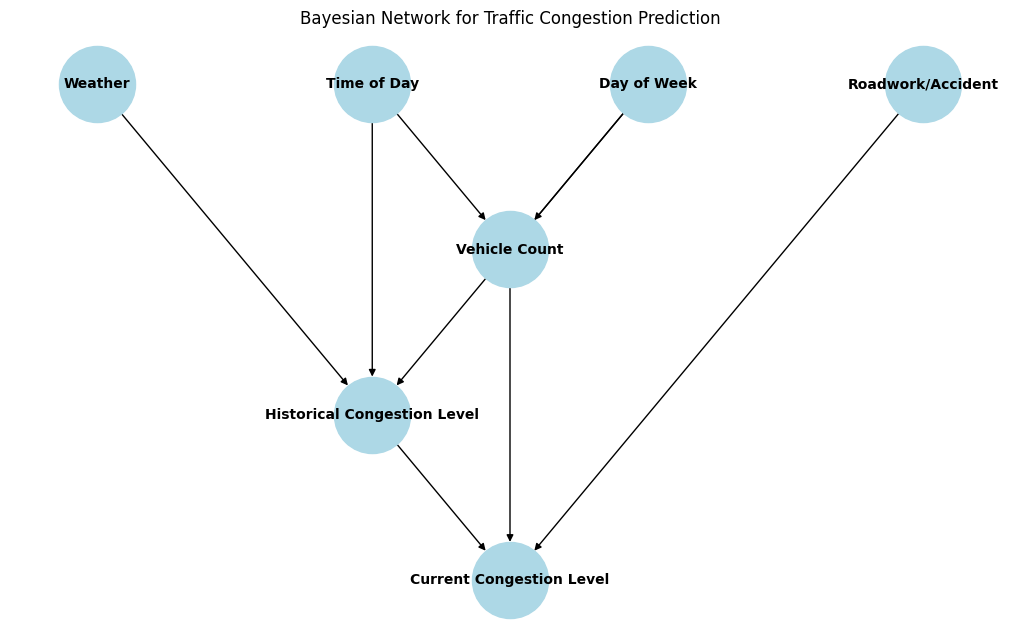

In [29]:
# Create a directed graph for the Bayesian Network
G = nx.DiGraph()

# Add nodes
nodes = ["Weather", "Time of Day", "Day of Week", "Roadwork/Accident", "Vehicle Count",
         "Historical Congestion Level", "Current Congestion Level"]
G.add_nodes_from(nodes)

# Add edges based on the Bayesian network structure
edges = [
    ("Weather", "Historical Congestion Level"),
    ("Time of Day", "Vehicle Count"),
    ("Day of Week", "Vehicle Count"),
    ("Time of Day", "Historical Congestion Level"),
    ("Day of Week", "Historical Congestion Level"),
    ("Historical Congestion Level", "Current Congestion Level"),
    ("Roadwork/Accident", "Current Congestion Level"),
    ("Vehicle Count", "Current Congestion Level")
]

G.add_edges_from(edges)

# Set positions for nodes
pos = {
    "Weather": (0, 3),
    "Time of Day": (2, 3),
    "Day of Week": (4, 3),
    "Roadwork/Accident": (6, 3),
    "Vehicle Count": (3, 2),
    "Historical Congestion Level": (2, 1),
    "Current Congestion Level": (3, 0)
}

# Draw the Bayesian network graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black",
        node_size=3000, font_size=10, font_weight="bold", arrows=True)

# Add title
plt.title("Bayesian Network for Traffic Congestion Prediction")
plt.show()
